In [ ]:
# load spreadsheet of returns from Damodaran website into pandas dataframe
# damodaran sheet has average cpi over the year
# IMO this is laggy, should resample monthly to last but will leave it for now

In [1]:
import pandas as pd
import pandas_datareader as pdr

data_xls = 'http://www.stern.nyu.edu/~adamodar/pc/datasets/histretSP.xls'
data_sheet = "Returns by year"
# these 2 lines below may change as rows get added on Damodaran website

skiprows = range(17)
skipfooter = 10
download_df = pd.read_excel(data_xls, 
                         sheet_name=data_sheet, 
                         skiprows=skiprows,
                         skipfooter=skipfooter)
download_df = download_df.set_index('Year')
download_df.to_pickle('histretSP.pickle')
download_df[-10:]

,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,Baa Corporate Bond6,Stocks - Bills,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds
Year,,,,,,,,,,,,,,,,,
2011,0.020984,0.000525,0.160353,0.125845,166871.562968,1979.862293,6726.521265,30005.469568,0.020459,-0.139370,-0.104861,0.040970,0.031568,-0.010261,-0.030093,0.124844,0.091392
2012,0.158906,0.000858,0.029716,0.101247,193388.430926,1981.561675,6926.404686,33043.426707,0.158048,0.129190,0.057659,0.041988,0.020693,0.135410,-0.019433,0.008839,0.078920
2013,0.321451,0.000583,-0.091046,-0.010559,255553.308086,1982.717586,6295.785407,32694.520766,0.320868,0.412497,0.332010,0.046177,0.014648,0.302373,-0.013862,-0.104168,-0.024843
2014,0.135244,0.000325,0.107462,0.103849,290115.415011,1983.361969,6972.341867,36089.816610,0.134919,0.027782,0.031395,0.045975,0.016222,0.117122,-0.015643,0.089783,0.086228
2015,0.013789,0.000525,0.012843,-0.006975,294115.792218,1984.403234,7061.887631,35838.083510,0.013264,0.000946,0.020764,0.045434,0.001186,0.012588,-0.000661,0.011643,-0.008152
2016,0.117731,0.003175,0.006906,0.103651,328742.282302,1990.703714,7110.653529,39552.738791,0.114556,0.110825,0.014080,0.046177,0.012616,0.103805,-0.009323,-0.005639,0.089901
2017,0.216055,0.009308,0.028017,0.097239,399768.635072,2009.233848,7309.873866,43398.808328,0.206746,0.188038,0.118816,0.047687,0.021301,0.190692,-0.011743,0.006576,0.074354
2018,-0.042269,0.019392,-0.000167,-0.027626,382870.937409,2048.196241,7308.653674,42199.860601,-0.061660,-0.042102,-0.014642,0.046609,0.024426,-0.065104,-0.004914,-0.024006,-0.050811
2019,0.312117,0.015500,0.096356,0.153295,502371.389193,2079.943283,8012.888554,48668.870323,0.296617,0.215760,0.158822,0.048254,0.022900,0.282742,-0.007234,0.071812,0.127475


In [2]:
series = ['CPIAUCSL']

cpi_download = pdr.data.DataReader(series, 
                                   'fred', 
                                   start='1947-01-01')

cpi_download = cpi_download.reset_index()
cpi_download = cpi_download.resample('A', on='DATE').mean().reset_index()
# ? cpi_download = cpi_download.resample('A', on='DATE').last()
cpi_download = cpi_download.set_index(pd.DatetimeIndex(cpi_download['DATE']).year)

cpi_download['PCT_CHG'] = cpi_download['CPIAUCSL'].pct_change()
cpi_download[-10:]

,DATE,CPIAUCSL,PCT_CHG
DATE,,,
2011,2011-12-31,224.923000,0.031397
2012,2012-12-31,229.586083,0.020732
2013,2013-12-31,232.951750,0.014660
2014,2014-12-31,236.715000,0.016155
2015,2015-12-31,237.001750,0.001211
2016,2016-12-31,239.989167,0.012605
2017,2017-12-31,245.121333,0.021385
2018,2018-12-31,251.101417,0.024396
2019,2019-12-31,255.650750,0.018118


<AxesSubplot:>

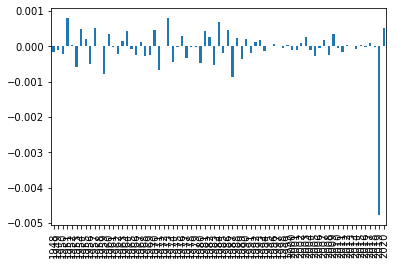

In [3]:
(cpi_download['PCT_CHG']-download_df['Inflation Rate']).dropna().plot.bar()

<AxesSubplot:xlabel='Year'>

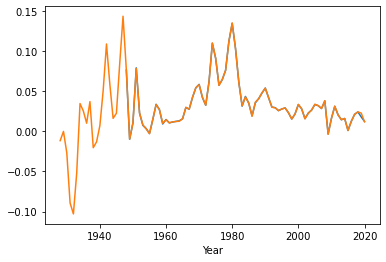

In [5]:
cpi_download['PCT_CHG'].plot()
download_df['Inflation Rate'].plot()

In [ ]:
series = ['CPIAUCSL']

cpi_download = pdr.data.DataReader(series, 
                                   'fred', 
                                   start='1947-01-01')

cpi_download = cpi_download.reset_index()
cpi_download = cpi_download.resample('A', on='DATE').last()
cpi_download = cpi_download.set_index(pd.DatetimeIndex(cpi_download['DATE']).year)

cpi_download['PCT_CHG'] = cpi_download['CPIAUCSL'].pct_change()
cpi_download[-10:]

In [ ]:
(cpi_download['PCT_CHG']-download_df['Inflation Rate']).dropna().plot.bar()